<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/OutlierTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are Outliers

In [11]:
#some hypothetical dataset - let's say price of vegetables in a shop
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9] # here dataset is small and we can visually see the odd one out

In [13]:
sample.sort()
print(sample)


[5, 7, 9, 10, 11, 13, 15, 15, 16, 18, 21, 101]


In [5]:
# let's find mean
sum(sample)/len(sample)



20.083333333333332

In [14]:
# median of this data
(13+15)/2

14.0

In [15]:
import numpy as np
np.std(sample)

24.794012494059036

In [16]:
np.mean(sample)

20.083333333333332

In [18]:
np.median(sample)

14.0

In [19]:
# lets drop outlier
new_sample=[5, 7, 9, 10, 11, 13, 15, 15, 16, 18, 21]
print(np.mean(new_sample))
print(np.median(new_sample))
print(np.std(new_sample))


12.727272727272727
13.0
4.614028196527098


We can see mean and std are highly impacted by outlier while median is not

# Detecting Outliers

In [27]:
#let's also see distribution
import pandas as pd
# Convert list to DataFrame
df1 = pd.DataFrame(sample, columns=['Values'])
df1


,Values
0,5
1,7
2,9
3,10
4,11
5,13
6,15
7,15
8,16
9,18


In [28]:
df2 = pd.DataFrame(new_sample, columns=['Values'])
df2

,Values
0,5
1,7
2,9
3,10
4,11
5,13
6,15
7,15
8,16
9,18


## Five Point Summary

In [29]:
df1.describe()

,Values
count,12.000000
mean,20.083333
std,25.896501
min,5.000000
25%,9.750000
50%,14.000000
75%,16.500000
max,101.000000


In [30]:
df2.describe()

,Values
count,11.000000
mean,12.727273
std,4.839234
min,5.000000
25%,9.500000
50%,13.000000
75%,15.500000
max,21.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Distribution - Skewness

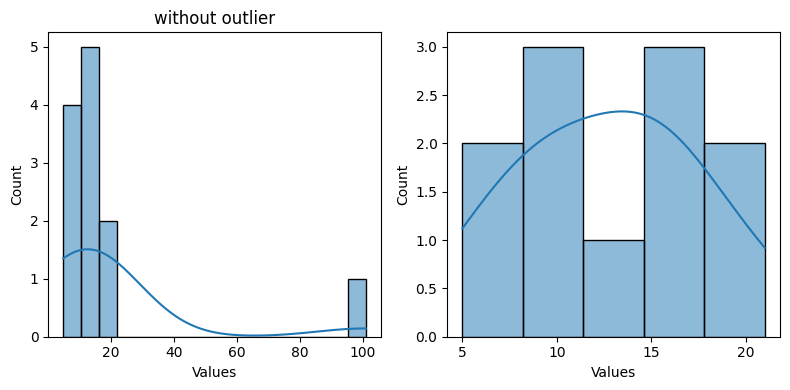

In [36]:
#create figure with subplots

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.histplot(df1['Values'],kde=True, ax=ax[0])
ax[0].set_title('with outlier')

sns.histplot(df2['Values'],kde=True, ax=ax[1])
ax[0].set_title('without outlier')
plt.tight_layout()
plt.show()


## Boxplot

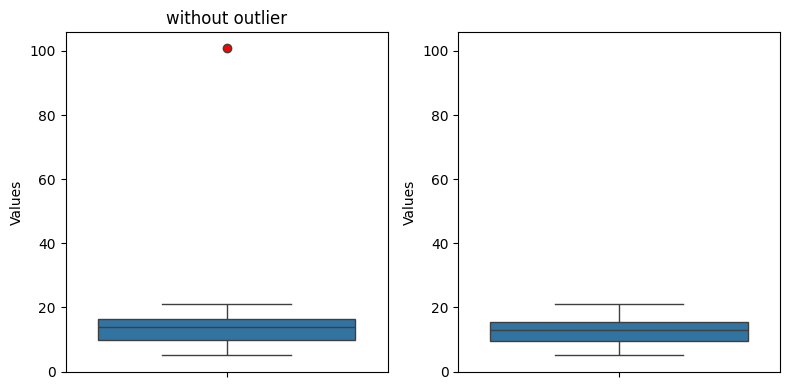

In [39]:
#create figure with subplots

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.boxplot(df1['Values'], ax=ax[0],flierprops=dict(markerfacecolor='r'))
ax[0].set_title('with outlier')

sns.boxplot(df2['Values'], ax=ax[1],flierprops=dict(markerfacecolor='r'))
ax[0].set_title('without outlier')
ylim = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(0, ylim)
ax[1].set_ylim(0, ylim)

plt.tight_layout()
plt.show()


## Z-Score

In [42]:
df1['ZScore'] = (df1['Values'] - df1['Values'].mean())/df1['Values'].std()
outliers_zscore = df1[abs(df1['ZScore']) >3]
outliers_zscore

,Values,ZScore
11,101,3.124618


## IQR

# Real World Dataset - AirBnb Price Listing
